In [1]:
import itertools as it
import toolz as tls
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from src.experiments import compare_guarantees_experiment
from src.experiments import bargaining_gap_experiment
from src.experiments import total_surplus_experiment
%matplotlib inline

# settings

In [11]:
NUMBER_OF_EXPERIMENTS = 100
PRECISION = 10 # 6 decimal places

In [12]:
def calc_raios(data, metric_cols, all_cols, group_cols):
    ratios = pd.DataFrame()
    sorted_tuple = tls.compose(tuple, sorted)
    combs = set(map(sorted_tuple, it.product(metric_cols, all_cols)))
    for g1, g2 in combs:
        if g1 == g2:
            continue

        ratios[f'{g1}/{g2}'] = data[g1]/data[g2]

    for gc in group_cols:
        ratios[gc] = data[gc]

    return ratios

def title(title_str, section):
    return 

# 1. Comparing guarantees

In [4]:
cg_exp = compare_guarantees_experiment.CompareGuaranteeExperiment()
cg_exp.run_and_save(NUMBER_OF_EXPERIMENTS)
cg_exp.columns

{'dc_gr',
 'familiar_share_gr',
 'goods_num',
 'max_min_gr',
 'min_max_gr',
 'sb_gr',
 'utility_type'}

In [5]:
data = cg_exp.load_experiment()

### Normalized mean guarantees values from all experiments for different goods number

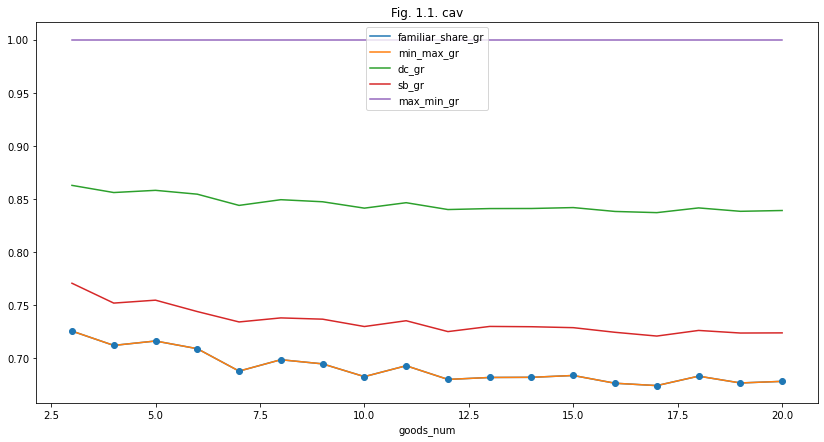

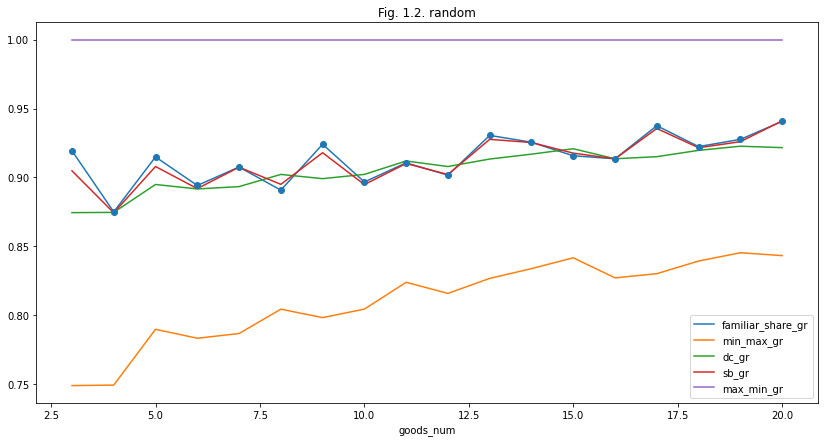

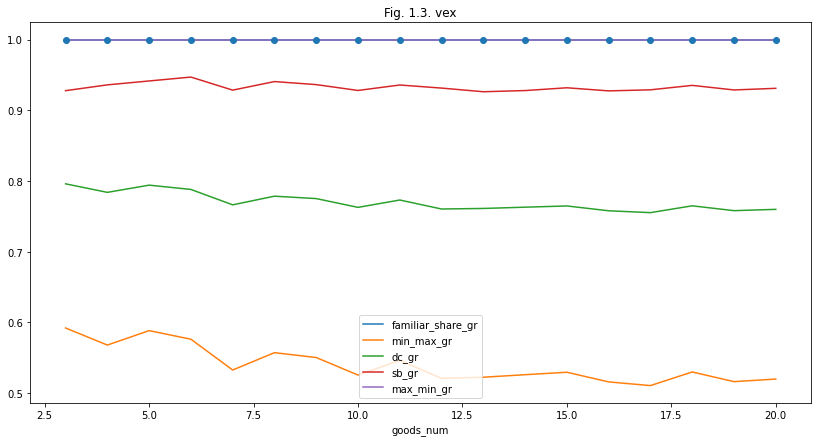

In [10]:
r_data = data.groupby(['utility_type', 'goods_num']).mean()
for idx, i in enumerate(r_data.index.unique('utility_type'), 1):
    gr = r_data.loc[i].plot(figsize=(14, 7), title=f'Fig. 1.{idx}. {i}', style='-')
    [line] = [l for l in gr.get_lines() if l.get_label() == 'familiar_share_gr']
    r_data.loc[i]['familiar_share_gr'].plot(style='o', color=line.get_color())

### check that all guarantees lies beetween min_max and max_min guarantees. </br>

In [17]:
guarantees_columns = [
    'dc_gr',
    'familiar_share_gr',
    'max_min_gr',
    'min_max_gr',
    'sb_gr',
]
data[data['min_max_gr'].round(PRECISION) > data[guarantees_columns].min(axis=1).round(PRECISION)]

,dc_gr,familiar_share_gr,max_min_gr,utility_type,min_max_gr,sb_gr,goods_num


In [18]:
data[data['max_min_gr'].round(PRECISION) < data[guarantees_columns].max(axis=1).round(PRECISION)]

,dc_gr,familiar_share_gr,max_min_gr,utility_type,min_max_gr,sb_gr,goods_num


#### Looks like there is no violation for used prcision (10 decimal digits)

### Calculate ratios statistics

In [84]:
ratios = calc_raios(data, ('dc_gr','familiar_share_gr', 'sb_gr'), guarantees_columns, ['utility_type', 'goods_num'])

#### Ratios mean

TODO: (x - minMax)/(maxMin - minMax) for all guaratees

In [85]:
ratios.groupby(['utility_type']).mean().drop(columns=['goods_num'])

,dc_gr/sb_gr,max_min_gr/sb_gr,dc_gr/min_max_gr,min_max_gr/sb_gr,familiar_share_gr/min_max_gr,familiar_share_gr/sb_gr,dc_gr/familiar_share_gr,dc_gr/max_min_gr,familiar_share_gr/max_min_gr
utility_type,,,,,,,,,
cav,1.151730,1.364329,1.228550,0.939132,1.000000,0.939132,1.228550,0.845877,0.691755
random,0.997845,1.103006,1.128956,0.892685,1.150659,1.001375,0.999084,0.905962,0.915078
vex,0.825780,1.074114,1.485799,0.577446,1.971599,1.074114,0.771450,0.771450,1.000000


#### Ratios variance

In [86]:
ratios.groupby(['utility_type']).var().drop(columns=['goods_num'])

,dc_gr/sb_gr,max_min_gr/sb_gr,dc_gr/min_max_gr,min_max_gr/sb_gr,familiar_share_gr/min_max_gr,familiar_share_gr/sb_gr,dc_gr/familiar_share_gr,dc_gr/max_min_gr,familiar_share_gr/max_min_gr
utility_type,,,,,,,,,
cav,0.001173,0.006414,0.004071,0.001486,0.000000,0.001486,0.004071,0.000992,0.003969
random,0.007636,0.009814,0.014796,0.012380,0.069425,0.001413,0.011371,0.002404,0.007447
vex,0.001773,0.003134,0.112136,0.013490,0.448544,0.003134,0.004071,0.004071,0.000000


# 2. Bargaining gap: agents with same utility types

In [18]:
def bargaining_gap_plot(data, section):
    r_data = data.groupby(['utility_type', 'mix_param', 'scale_param', 'goods_num']).mean()
    for idx, i in enumerate(r_data.index.droplevel('goods_num').unique(), 1):
        title = str(dict(zip(r_data.index.names[:3], i)))
        title = f'Fig{section}.{idx}. {title}'
        (
            r_data
            .loc[(*i, slice(None))]
            .droplevel(['utility_type', 'mix_param', 'scale_param'])
            .plot(
                figsize=(14, 7), 
                title=title, 
                style='-'
            )
        )

In [19]:
bg_exp = bargaining_gap_experiment.BargainingGapExperiment()
bg_exp.run_and_save(NUMBER_OF_EXPERIMENTS)
bg_exp.columns

{'dc_gr_sum',
 'familiar_share_gr_sum',
 'goods_num',
 'max',
 'min',
 'mix_param',
 'sb_gr_sum',
 'scale_param',
 'utility_type'}

In [20]:
bg_group_cols = {'utility_type', 'goods_num', 'mix_param', 'scale_param'}
bg_data = bg_exp.load_experiment()

### Normalized mean sum guarantees values from all experiments for different goods number and params

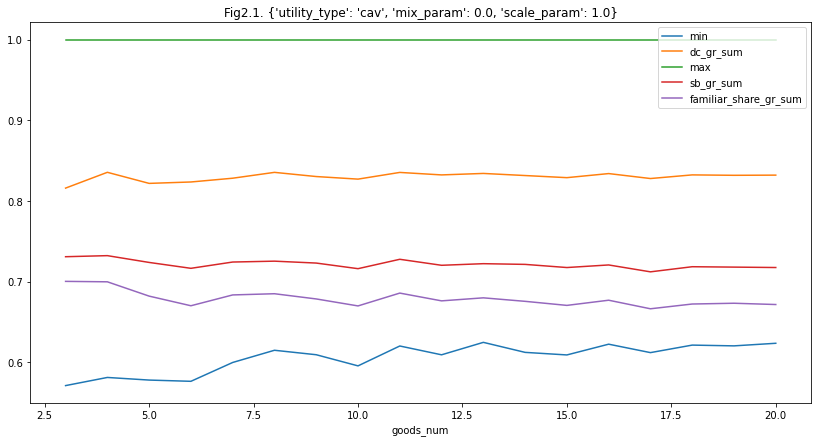

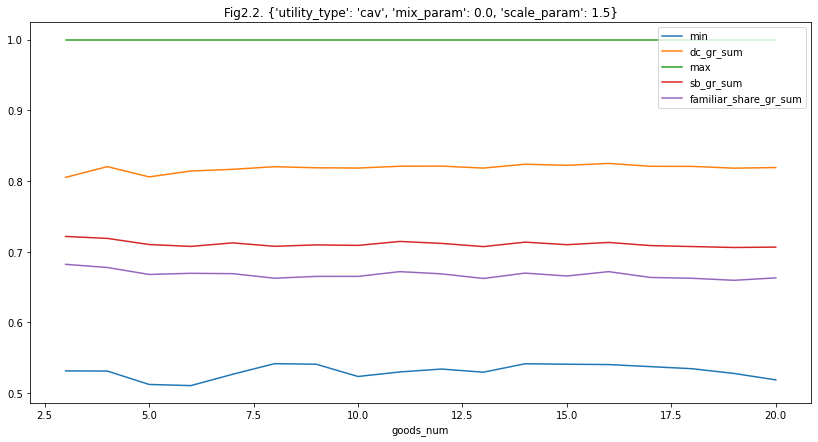

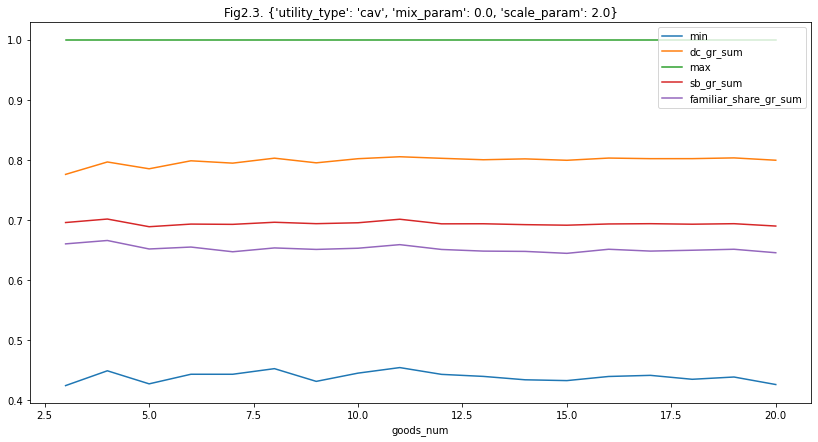

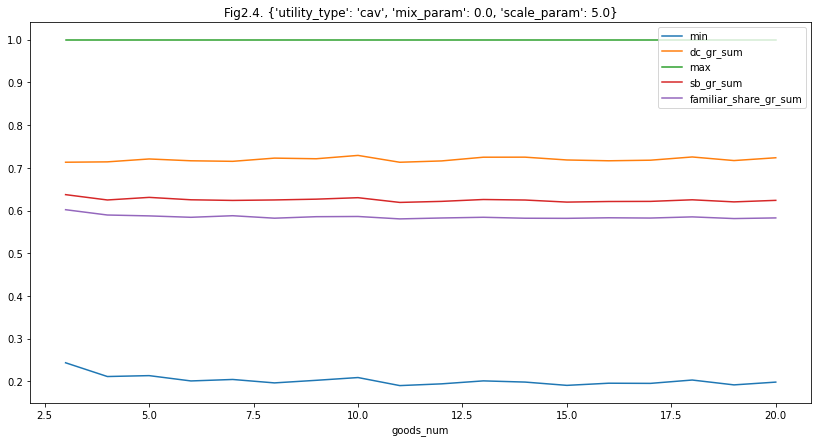

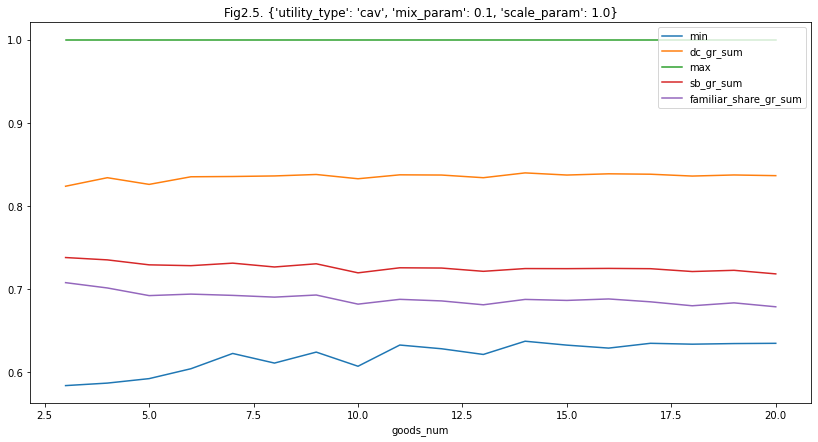

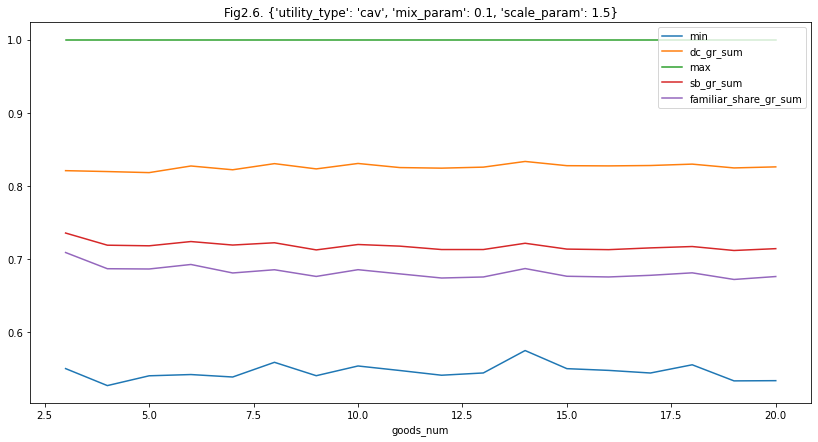

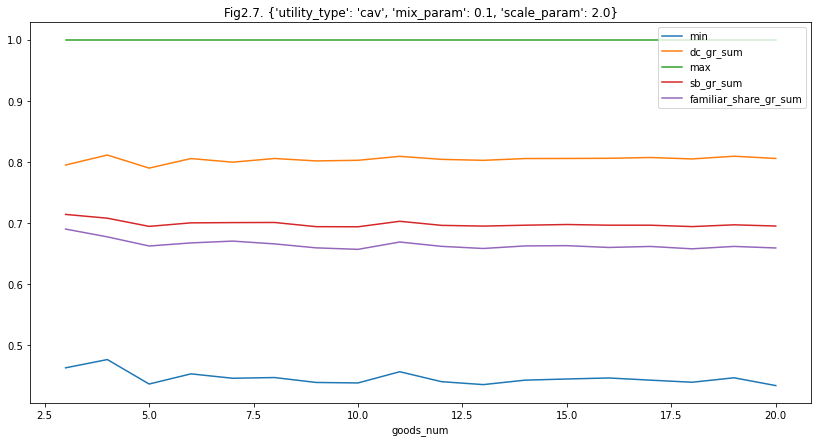

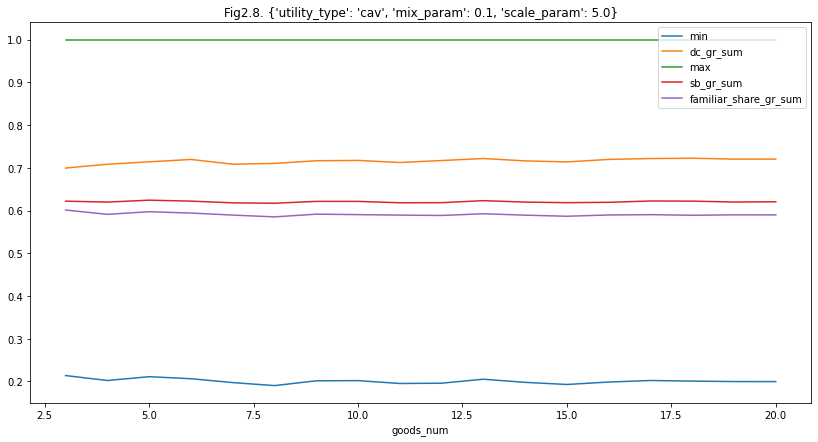

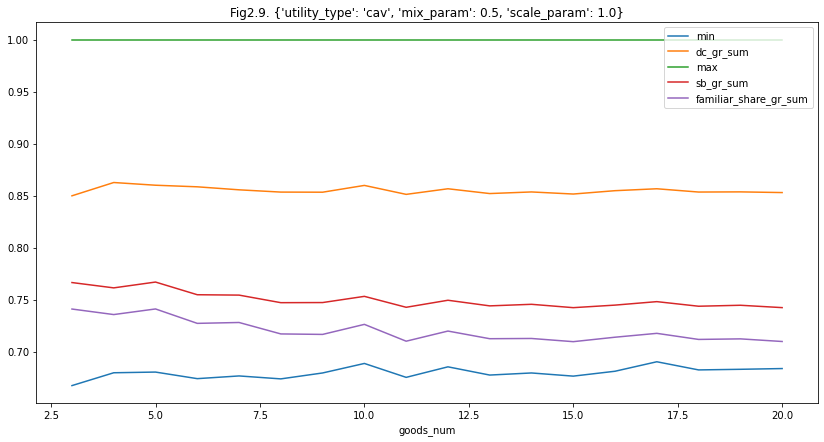

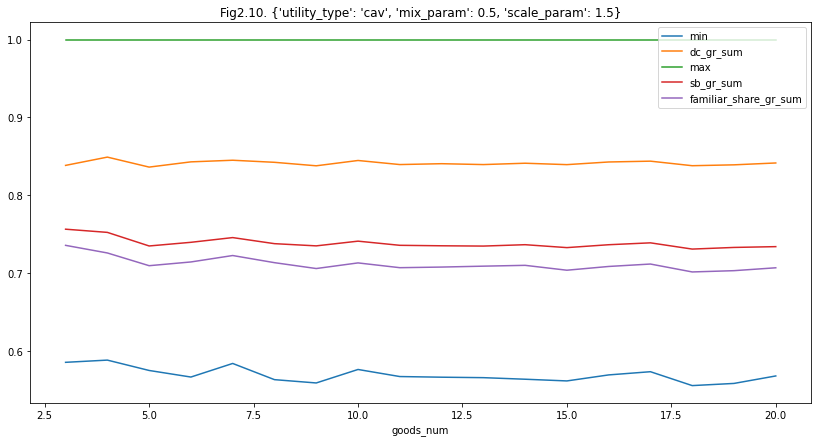

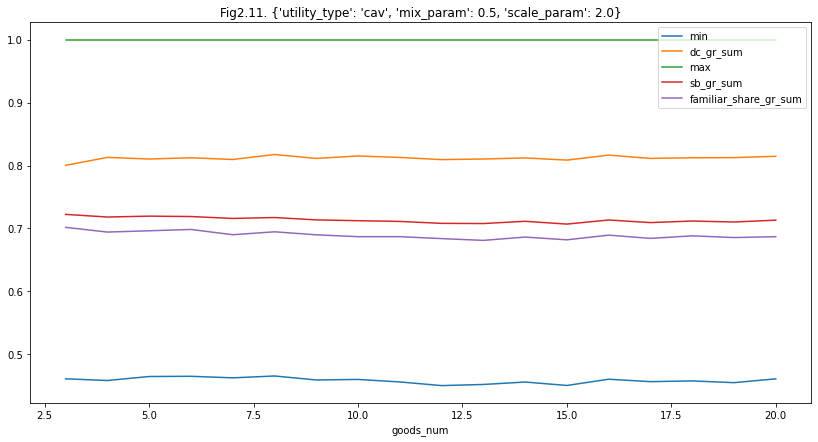

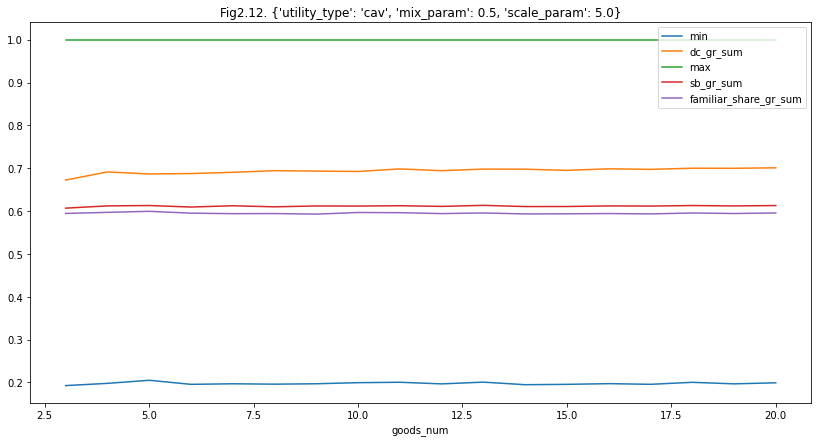

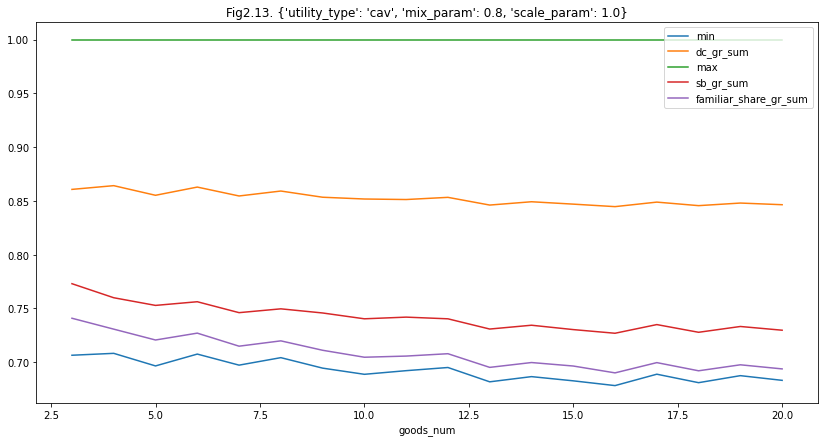

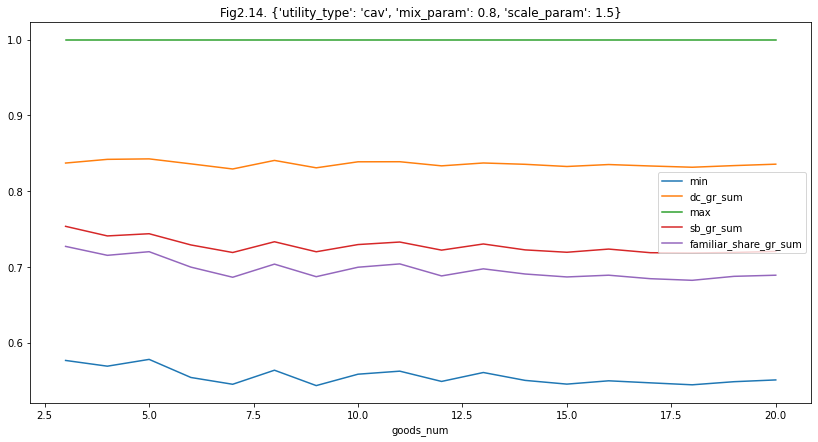

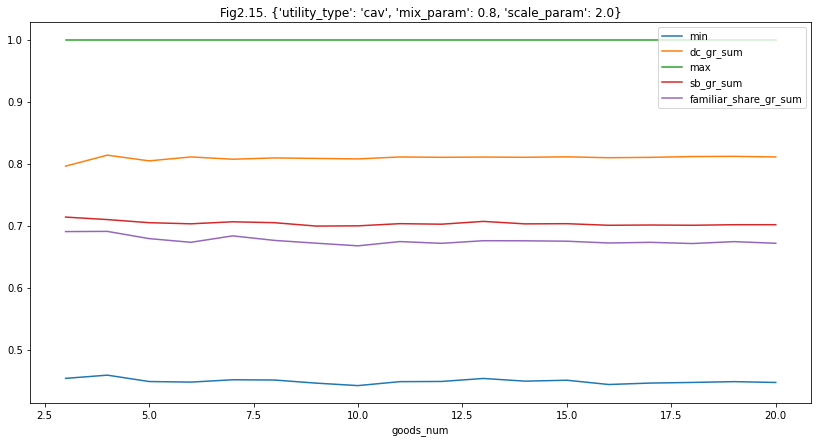

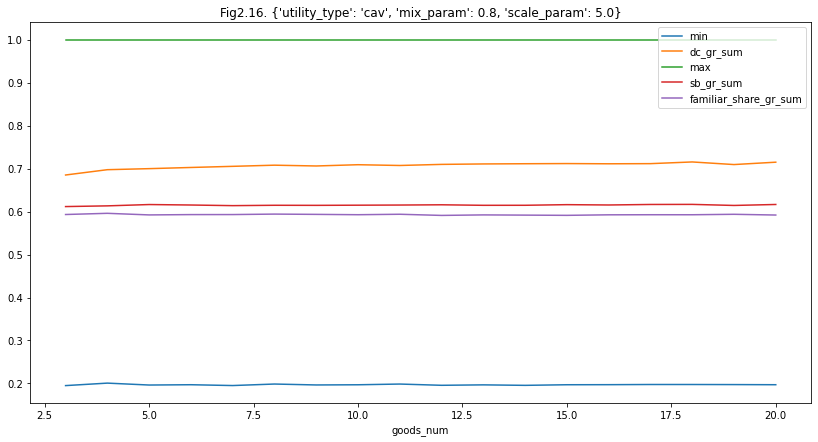

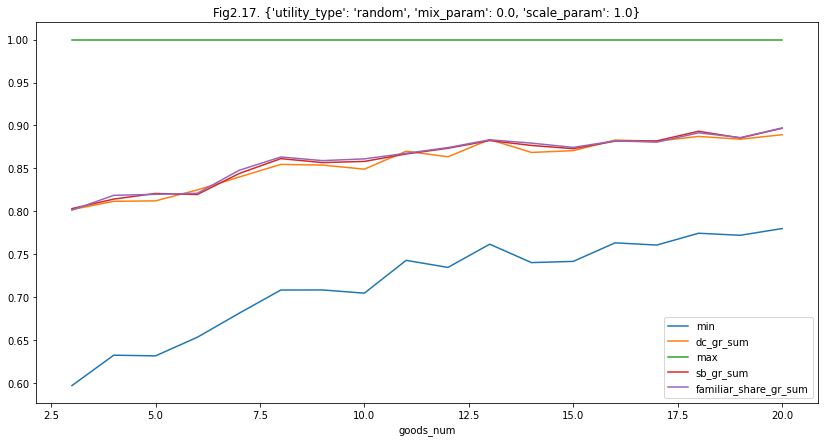

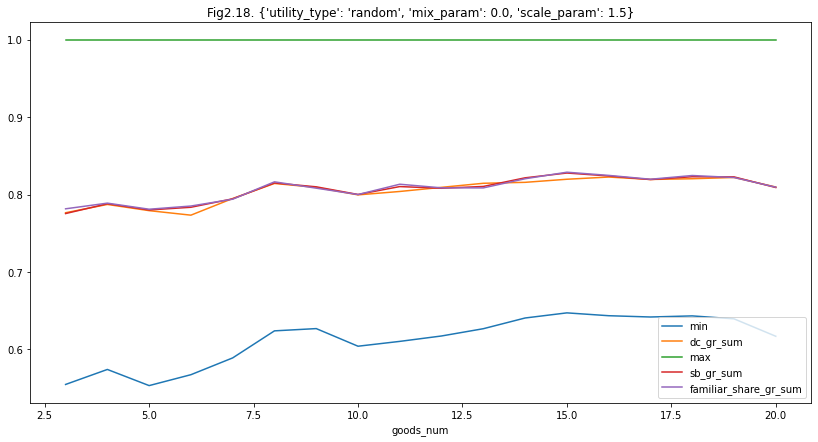

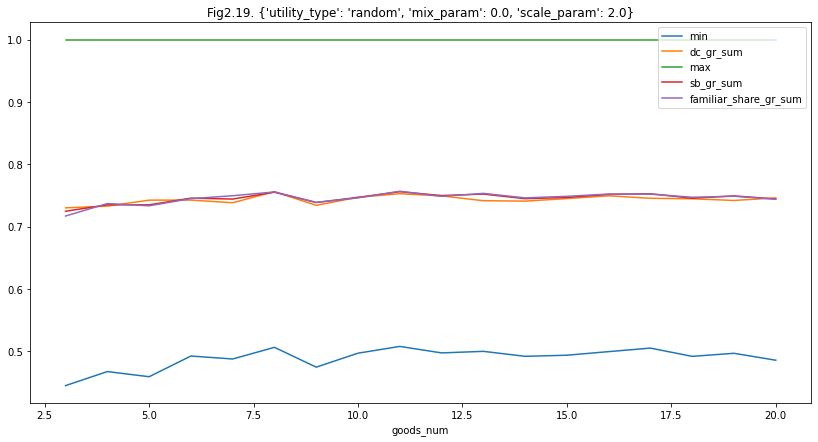

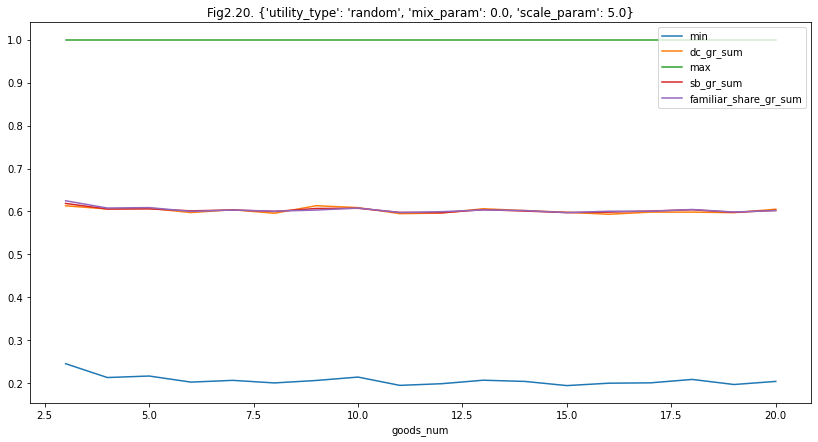

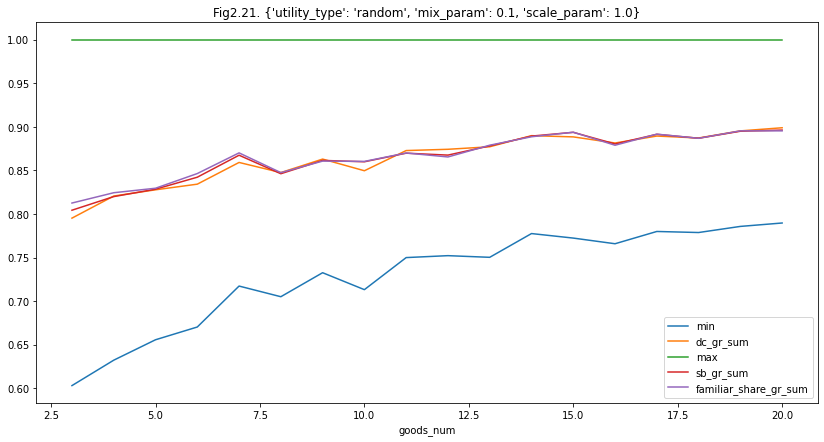

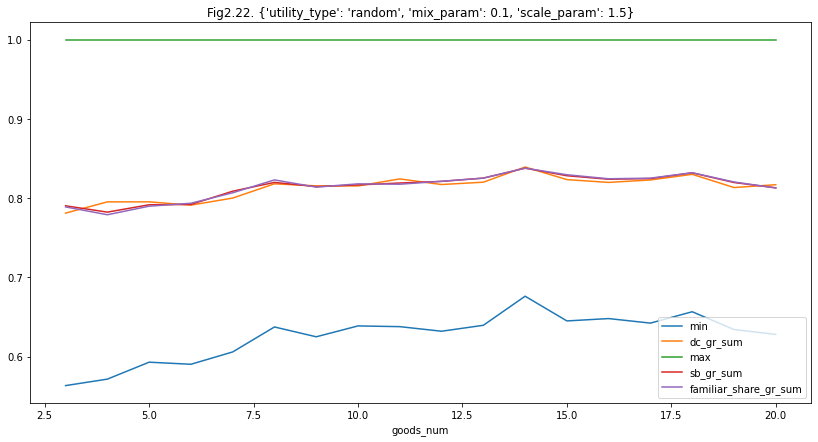

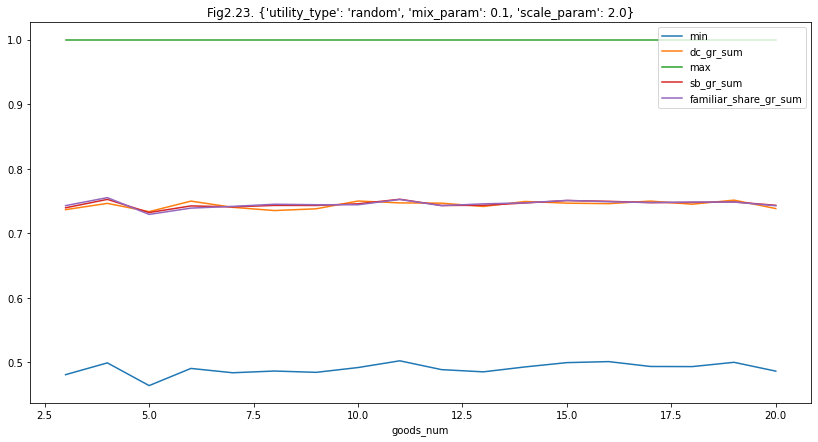

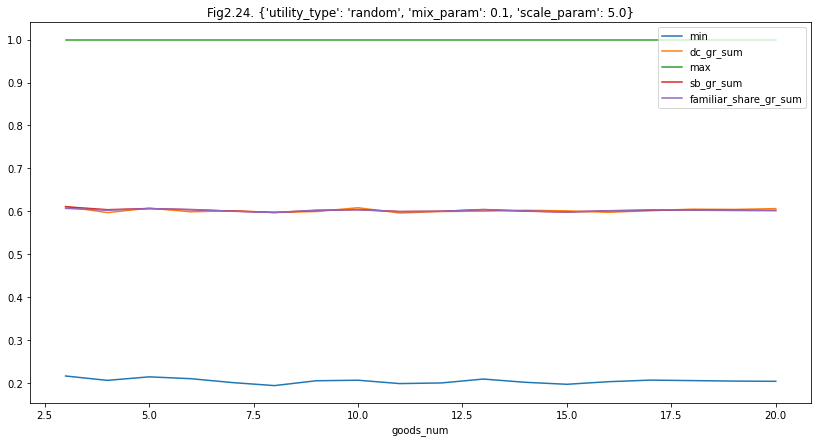

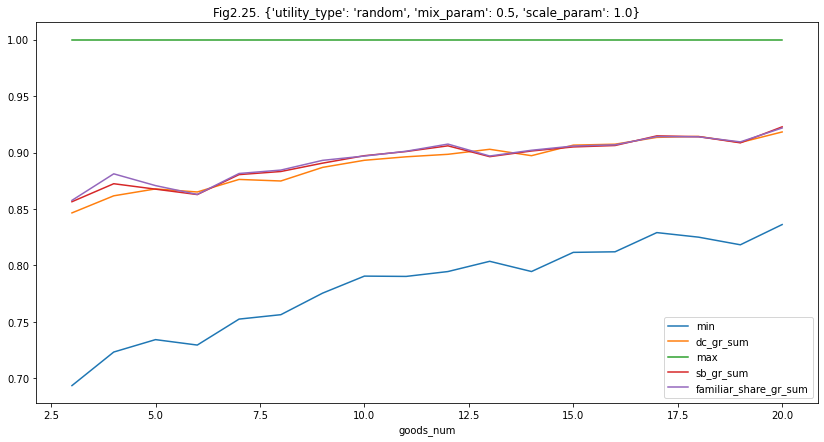

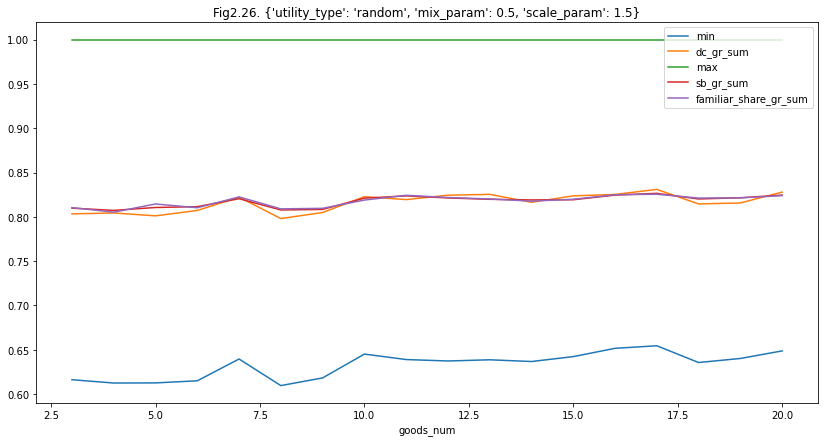

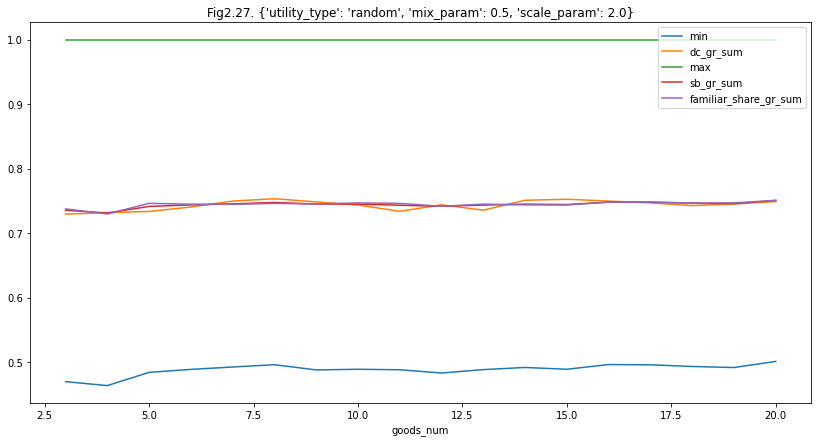

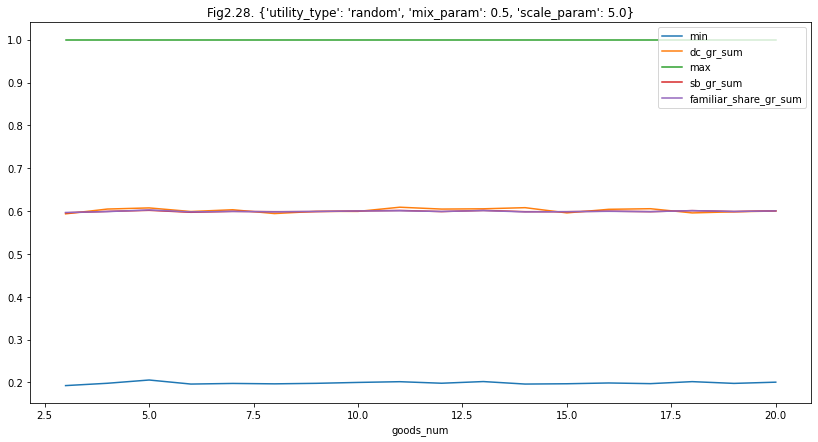

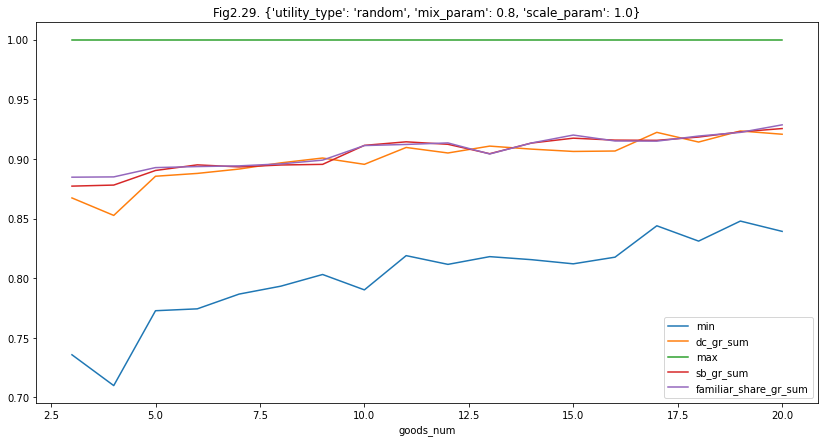

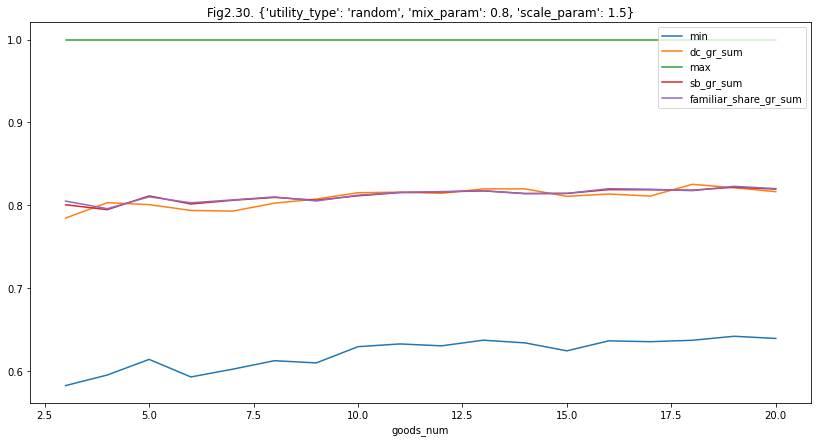

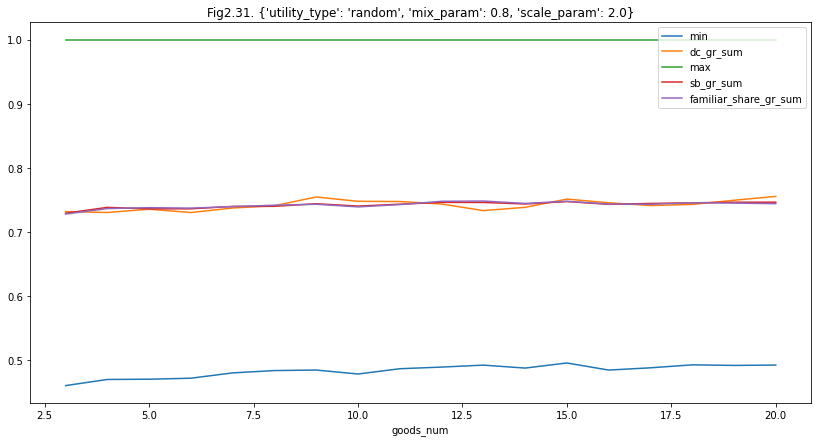

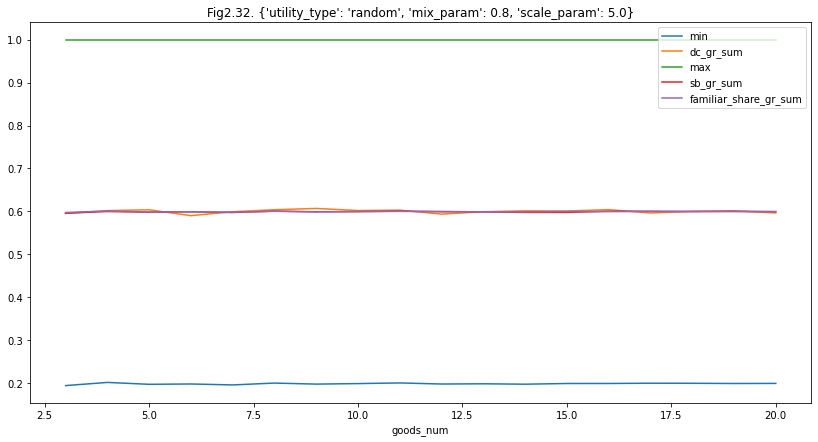

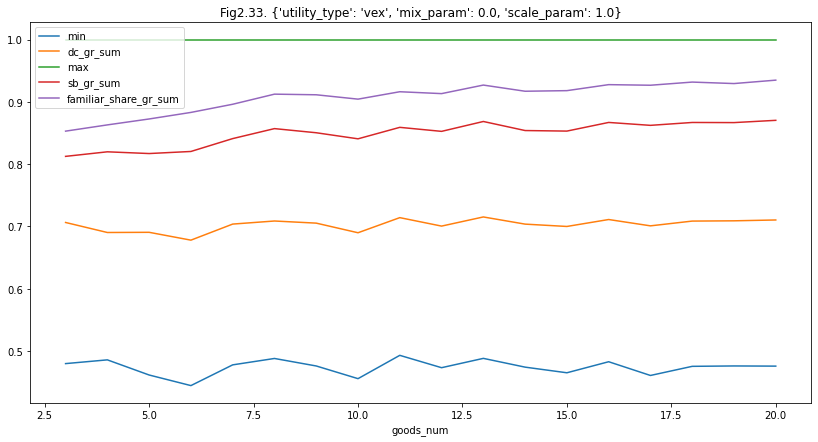

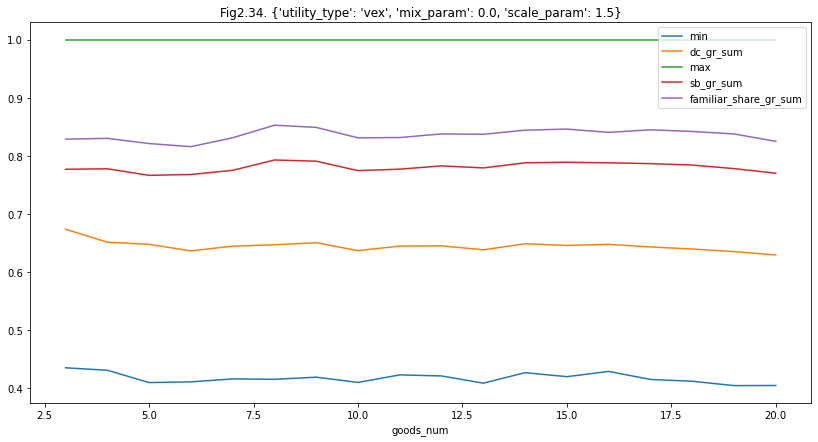

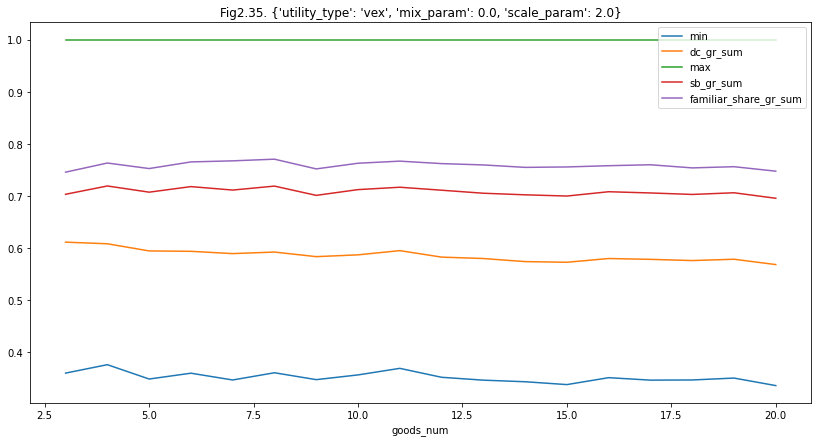

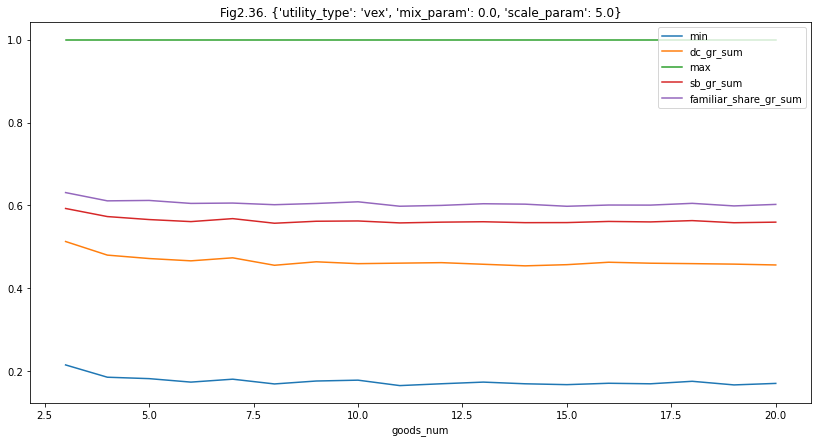

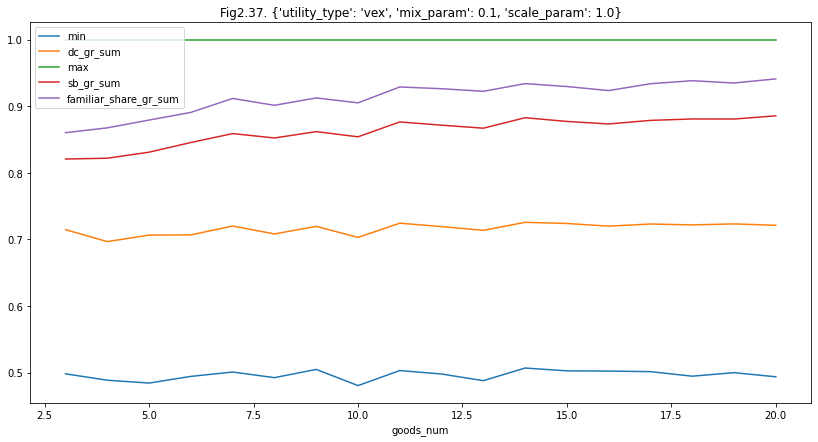

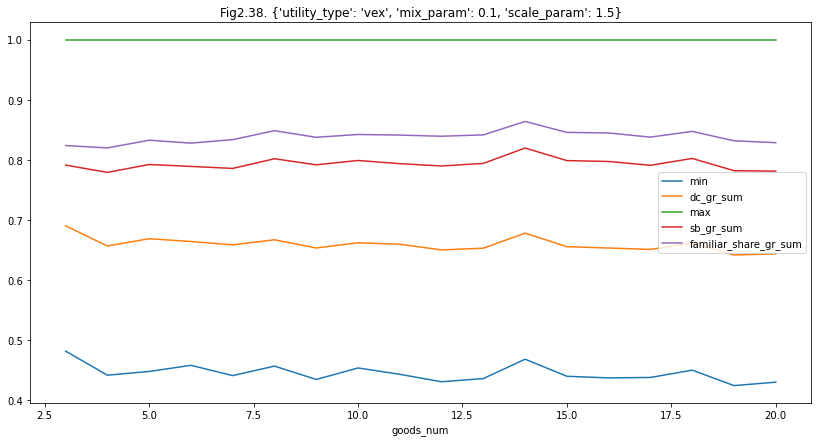

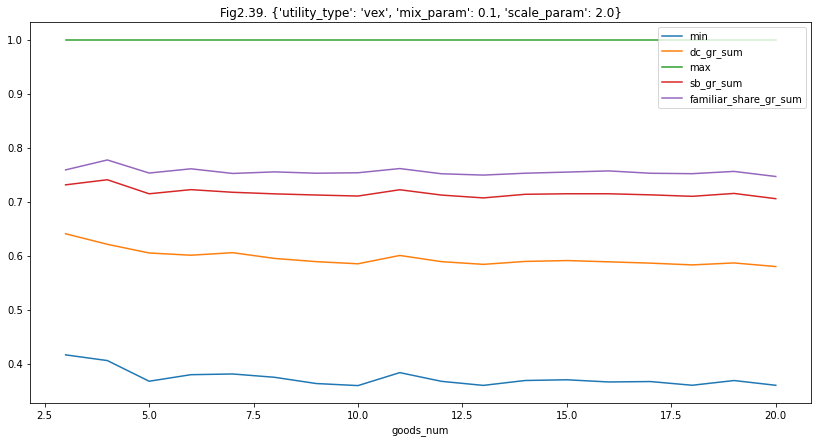

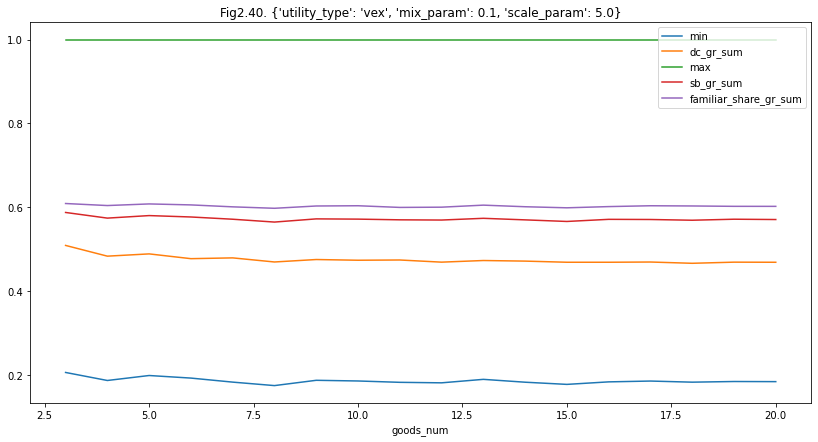

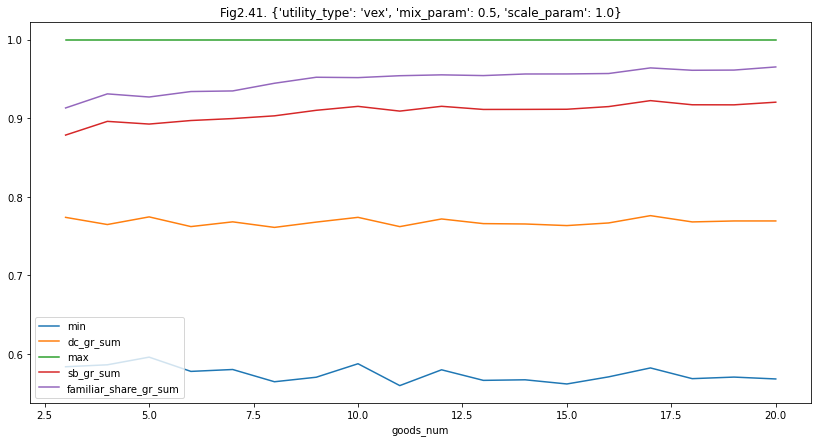

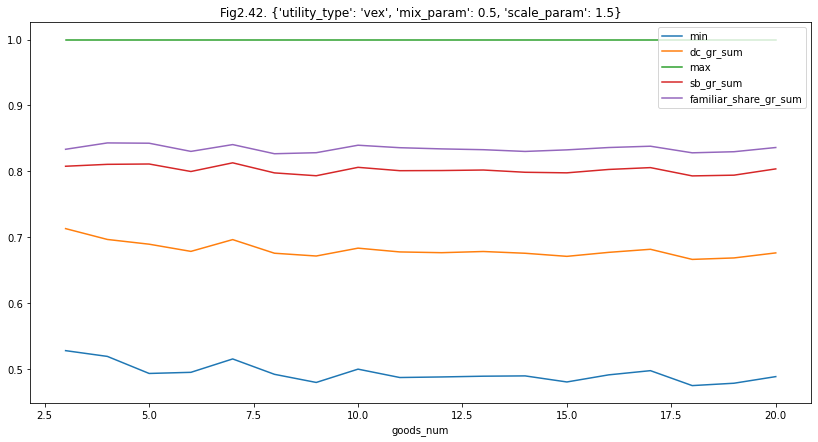

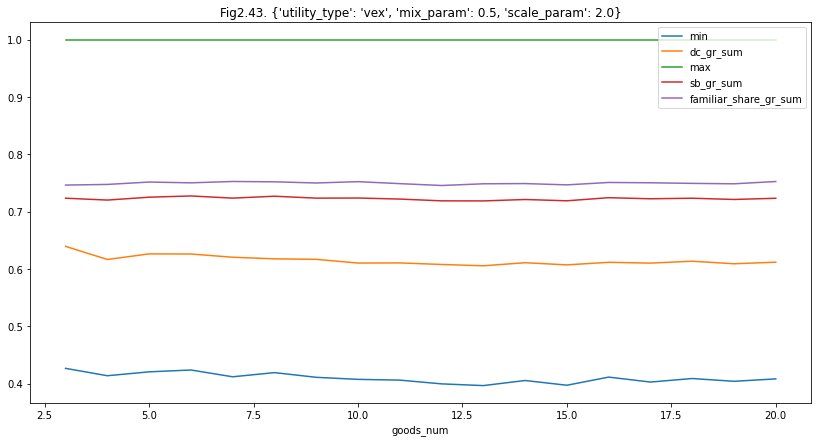

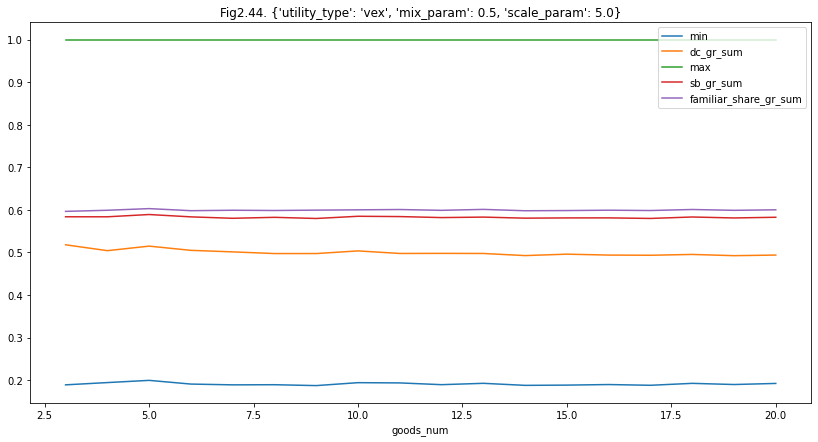

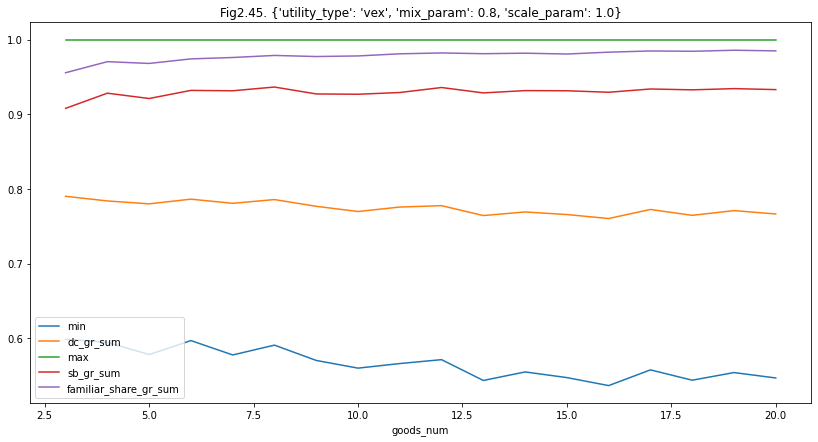

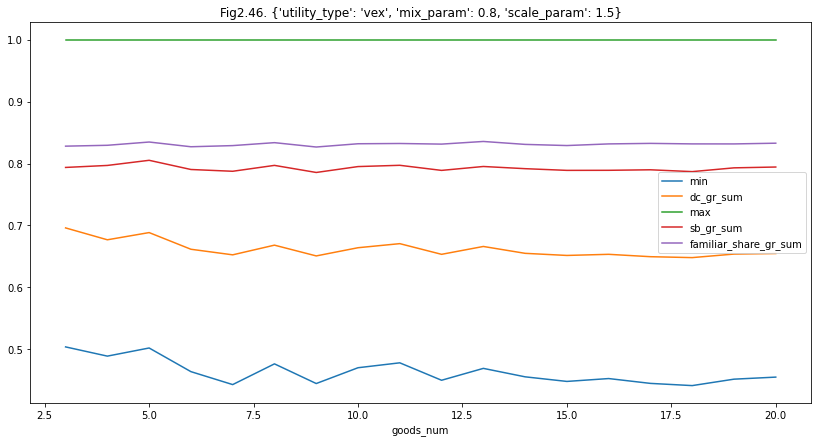

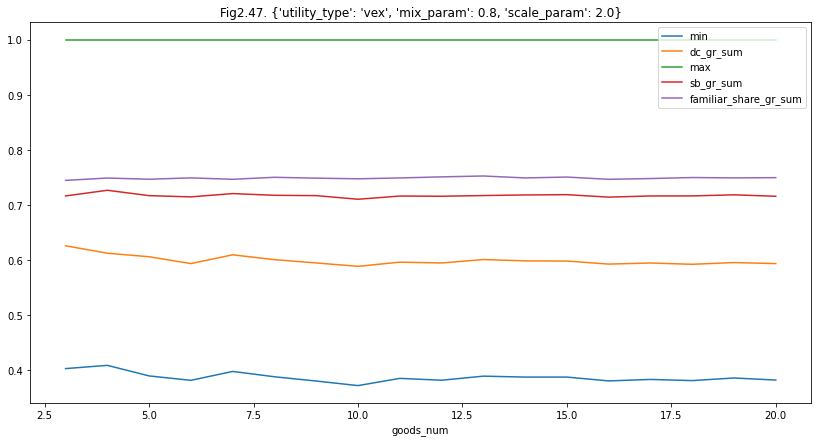

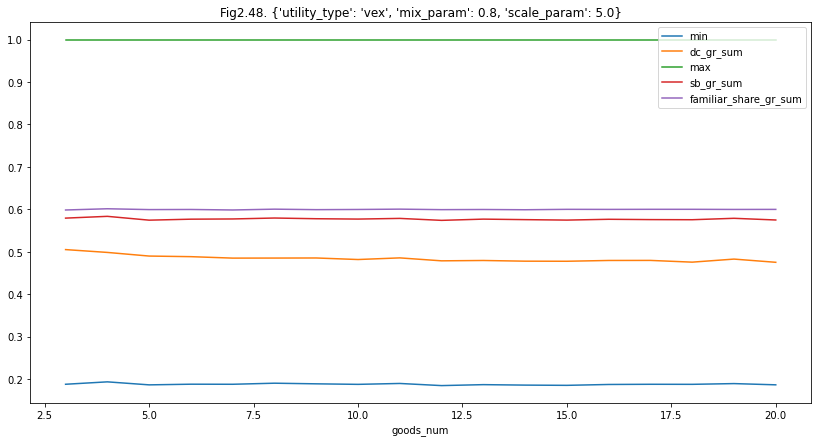

In [21]:
bargaining_gap_plot(bg_data, 2)

### check that all guarantees lies beetween min and max guarantees. </br>

In [22]:
sum_guarantees_columns = [
    'dc_gr_sum',
    'familiar_share_gr_sum',
    'max',
    'min',
    'sb_gr_sum',
]
bg_data[bg_data['max'].round(PRECISION) < bg_data[sum_guarantees_columns].max(axis=1).round(PRECISION)]

,scale_param,utility_type,min,dc_gr_sum,max,sb_gr_sum,goods_num,familiar_share_gr_sum,mix_param


In [23]:
bg_data[bg_data['min'].round(PRECISION) > bg_data[sum_guarantees_columns].min(axis=1).round(PRECISION)]

,scale_param,utility_type,min,dc_gr_sum,max,sb_gr_sum,goods_num,familiar_share_gr_sum,mix_param


#### all sum guarantees lies between min and max

### Calculate ratios statistics

In [24]:
bg_ratios = calc_raios(
    bg_data, 
    ('dc_gr_sum','familiar_share_gr_sum', 'sb_gr_sum'), 
    sum_guarantees_columns,
    bg_group_cols
)

In [25]:
with pd.option_context('display.max_rows', None,):
    display(bg_ratios.groupby(list(bg_group_cols - {'goods_num'})).mean().drop(columns=['goods_num']))

dc_gr_sum/familiar_share_gr_sum  \
scale_param utility_type mix_param                                    
1.0         cav          0.0                               1.225484   
                         0.1                               1.215315   
                         0.5                               1.190298   
                         0.8                               1.208398   
            random       0.0                               0.997780   
                         0.1                               1.000064   
                         0.5                               1.000043   
                         0.8                               1.000215   
            vex          0.0                               0.774516   
                         0.1                               0.784685   
                         0.5                               0.809702   
                         0.8                               0.791602   
1.5         cav          0.0                               1.228222   
                         0.1                               1.213431   
                         0.5                               1.184824   
                         0.8                               1.204078   
            random       0.0                               0.999508   
                         0.1                               1.000740   
                         0.5                               0.999737   
                         0.8                               0.998916   
            vex          0.0                               0.771778   
                         0.1                               0.786569   
                         0.5                               0.815176   
                         0.8                               0.795922   
2.0         cav          0.0                               1.226921   
                         0.1                               1.211487   
                         0.5                               1.179714   
                         0.8                               1.200017   
            random       0.0                               0.998588   
                         0.1                               0.999020   
                         0.5                               0.999223   
                         0.8                               1.001504   
            vex          0.0                               0.773079   
                         0.1                               0.788513   
                         0.5                               0.820286   
                         0.8                               0.799983   
5.0         cav          0.0                               1.230330   
                         0.1                               1.211311   
                         0.5                               1.166661   
                         0.8                               1.193246   
            random       0.0                               0.997656   
                         0.1                               0.999870   
                         0.5                               1.003517   
                         0.8                               1.001124   
            vex          0.0                               0.769670   
                         0.1                               0.788689   
                         0.5                               0.833339   
                         0.8                               0.806754   

                                    dc_gr_sum/max  familiar_share_gr_sum/max  \
scale_param utility_type mix_param                                             
1.0         cav          0.0             0.829921                   0.678777   
                         0.1             0.835167                   0.688701   
                         0.5             0.854985                   0.720141   
                         0.8             0.852388                   0.708209   
     

In [26]:
with pd.option_context('display.max_rows', None,):
    display(bg_ratios.groupby(list(bg_group_cols - {'goods_num'})).var().drop(columns=['goods_num']))

dc_gr_sum/familiar_share_gr_sum  \
scale_param utility_type mix_param                                    
1.0         cav          0.0                               0.002337   
                         0.1                               0.002159   
                         0.5                               0.002171   
                         0.8                               0.003329   
            random       0.0                               0.005358   
                         0.1                               0.005315   
                         0.5                               0.006425   
                         0.8                               0.009599   
            vex          0.0                               0.002337   
                         0.1                               0.002159   
                         0.5                               0.002171   
                         0.8                               0.003329   
1.5         cav          0.0                               0.002357   
                         0.1                               0.002128   
                         0.5                               0.001940   
                         0.8                               0.003256   
            random       0.0                               0.006139   
                         0.1                               0.005246   
                         0.5                               0.006484   
                         0.8                               0.008711   
            vex          0.0                               0.002357   
                         0.1                               0.002128   
                         0.5                               0.001940   
                         0.8                               0.003256   
2.0         cav          0.0                               0.002503   
                         0.1                               0.002174   
                         0.5                               0.001956   
                         0.8                               0.002902   
            random       0.0                               0.005539   
                         0.1                               0.005557   
                         0.5                               0.006184   
                         0.8                               0.008379   
            vex          0.0                               0.002503   
                         0.1                               0.002174   
                         0.5                               0.001956   
                         0.8                               0.002902   
5.0         cav          0.0                               0.003046   
                         0.1                               0.002458   
                         0.5                               0.001948   
                         0.8                               0.002727   
            random       0.0                               0.007884   
                         0.1                               0.007031   
                         0.5                               0.005293   
                         0.8                               0.007650   
            vex          0.0                               0.003046   
                         0.1                               0.002458   
                         0.5                               0.001948   
                         0.8                               0.002727   

                                    dc_gr_sum/max  familiar_share_gr_sum/max  \
scale_param utility_type mix_param                                             
1.0         cav          0.0             0.000794                   0.001963   
                         0.1             0.000752                   0.001922   
                         0.5             0.000695                   0.002383   
                         0.8             0.000896                   0.003561   
     

# 3. Bargaining gap: agents with different utilities

In [27]:
bgm_exp = bargaining_gap_experiment.BargainingGapMixedUtilitiesExperiment()
bgm_exp.set_params(
    {
        'scale_param': [1, 5],  # lambda
        'mix_param': [0, 0.8],  # epsilon
    }
)
bgm_exp.run_and_save(NUMBER_OF_EXPERIMENTS)
bgm_exp.columns

{'dc_gr_sum',
 'familiar_share_gr_sum',
 'goods_num',
 'max',
 'min',
 'mix_param',
 'sb_gr_sum',
 'scale_param',
 'utility_type'}

### Normalized mean sum guarantees values from all experiments for different goods number and params

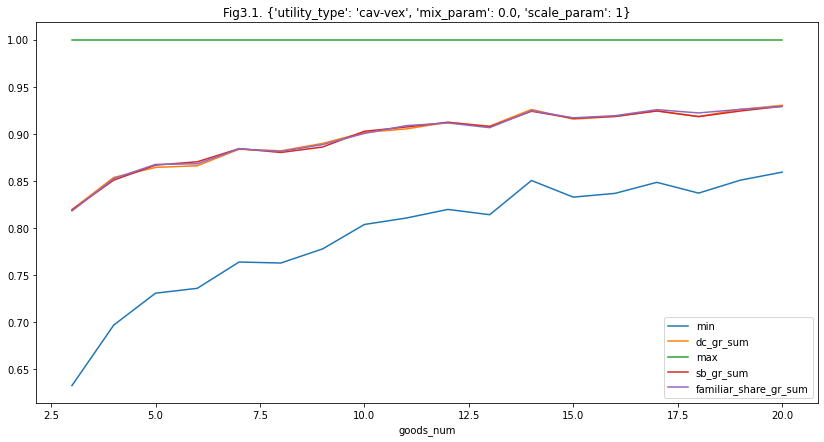

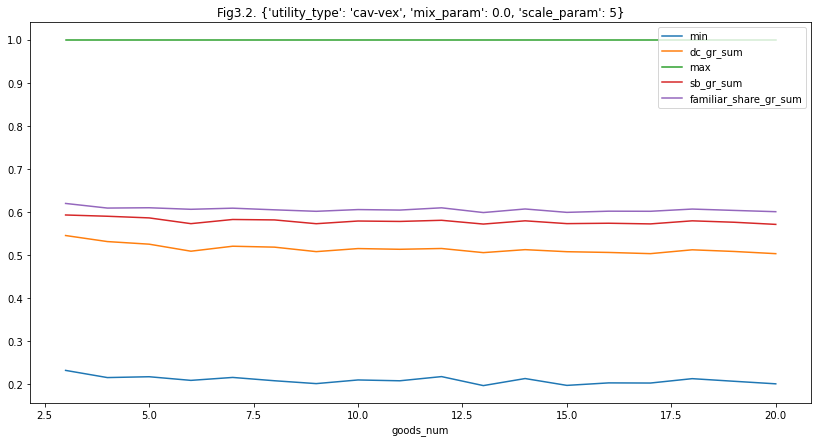

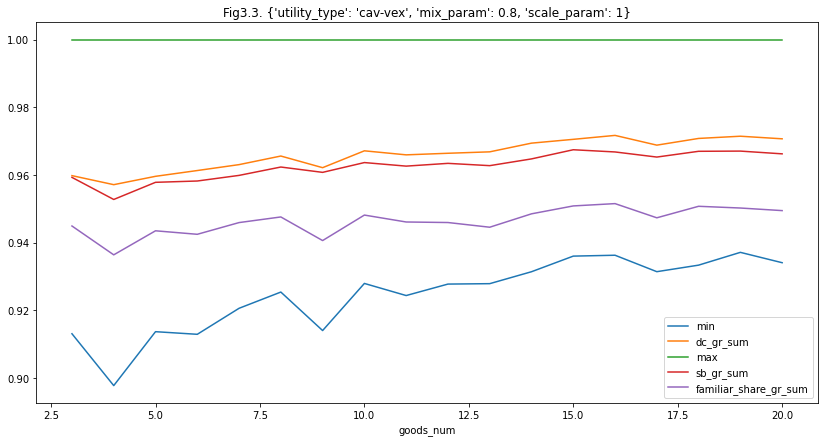

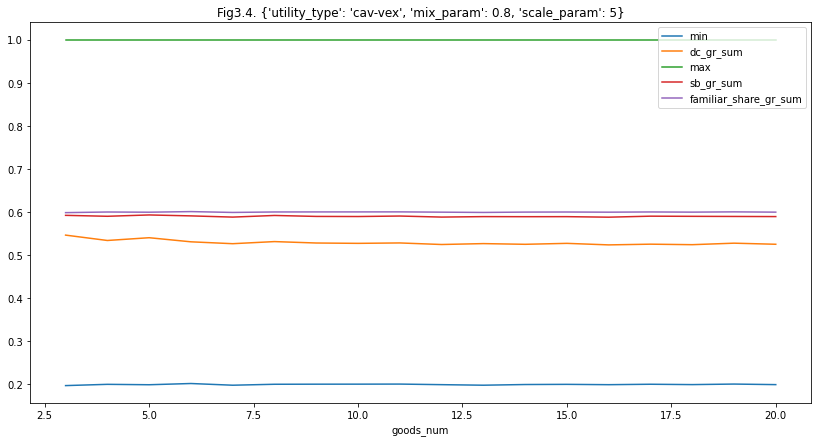

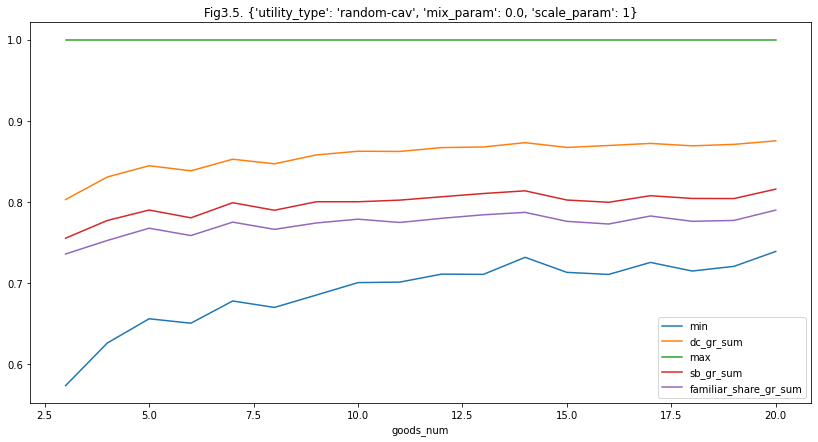

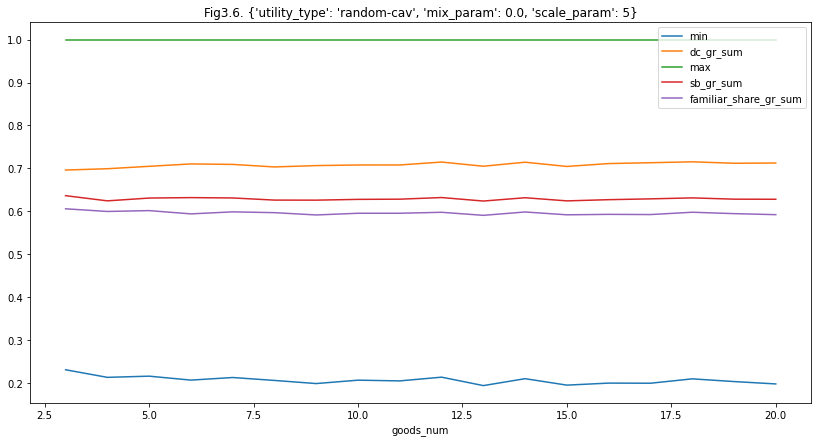

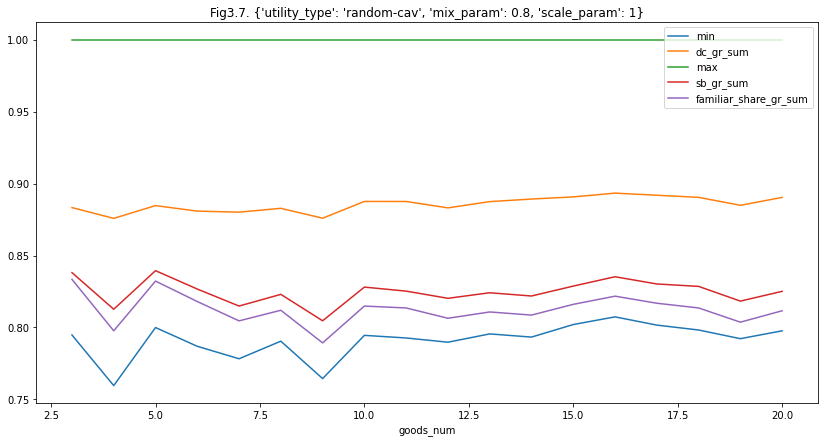

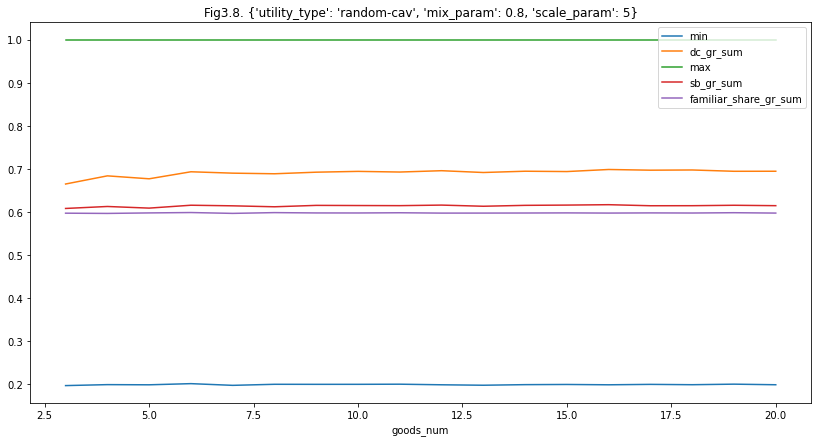

In [28]:
bgm_data = bgm_exp.load_experiment()
bargaining_gap_plot(bgm_data, 3)

# 4. Safe play mean total surplus

In [29]:
ts_exp = total_surplus_experiment.TotalSurplusExperiment()
ts_exp.set_params(
    {
        'scale_param': [1, 5],  # lambda
        'mix_param': [0, 0.8],  # epsilon
    }
)
ts_exp.run_and_save(NUMBER_OF_EXPERIMENTS)
ts_exp.columns

{'dc1_total_surplus',
 'dc2_total_surplus',
 'goods_num',
 'max',
 'max_utility',
 'min',
 'mix_param',
 'sb_total_surplus',
 'scale_param',
 'utility_type'}

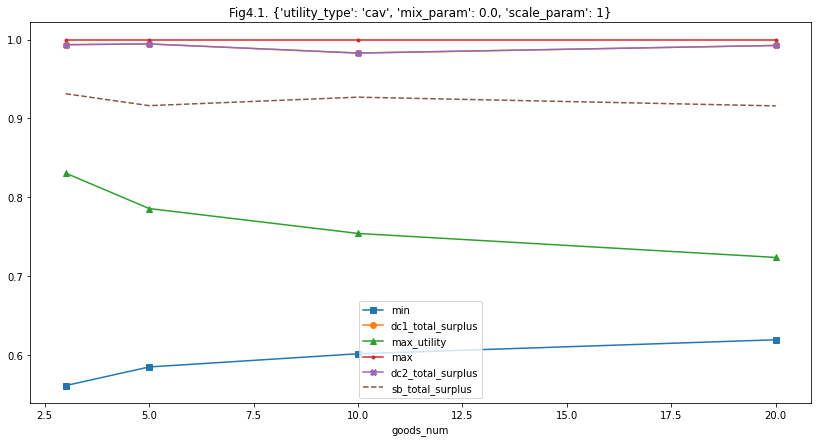

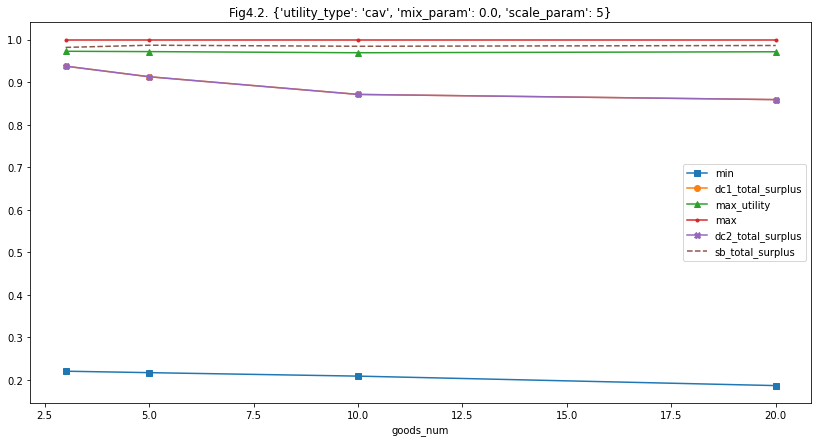

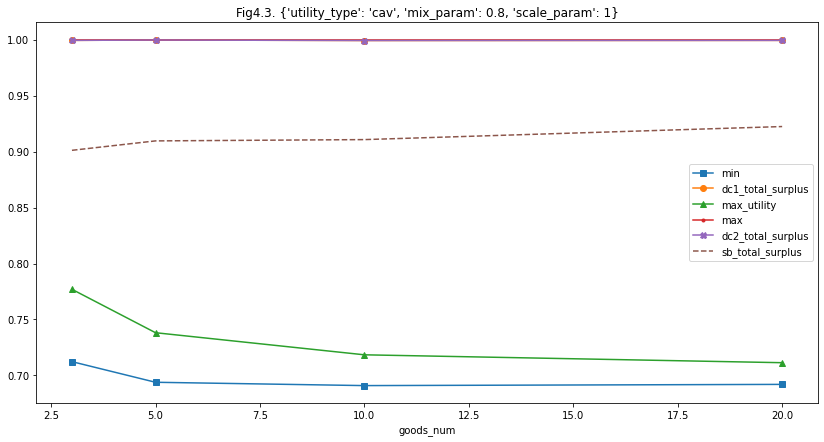

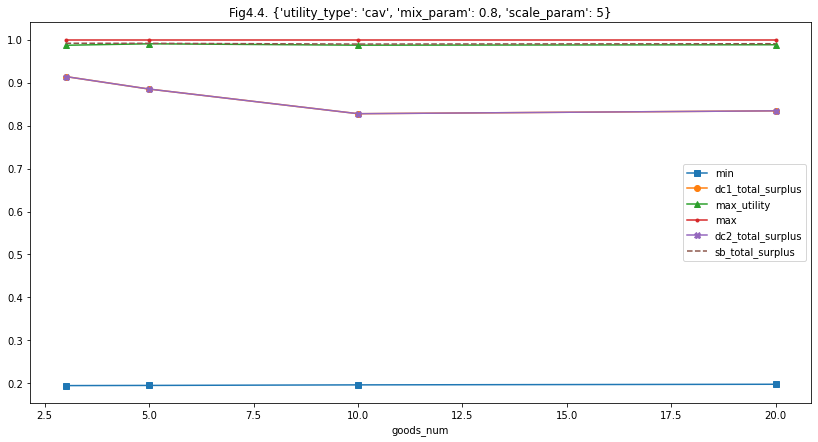

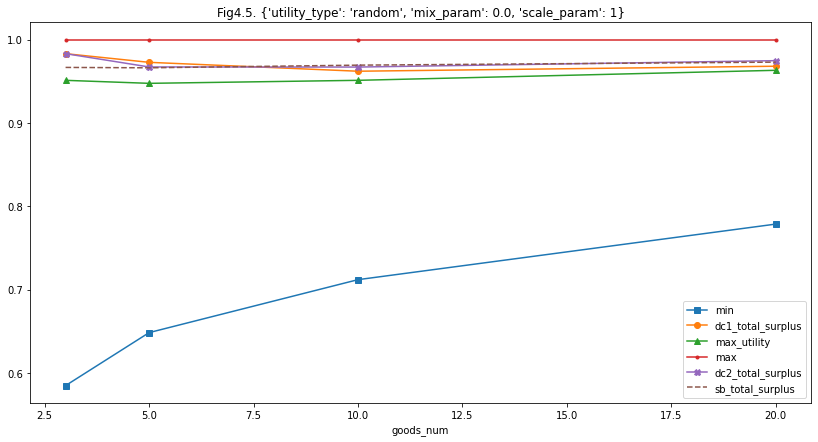

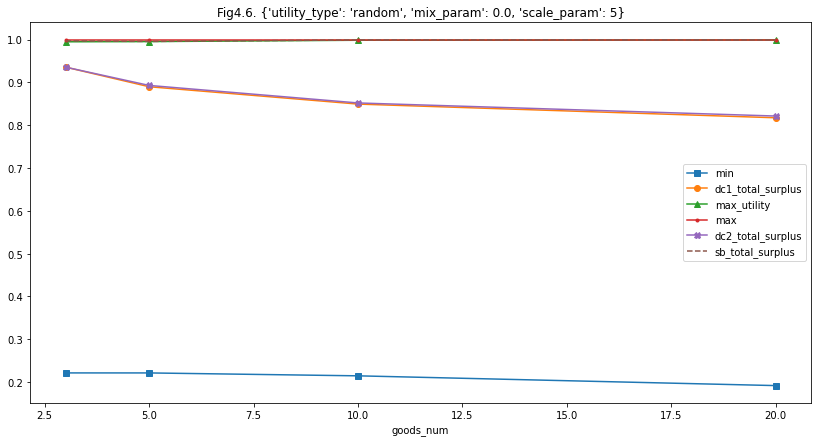

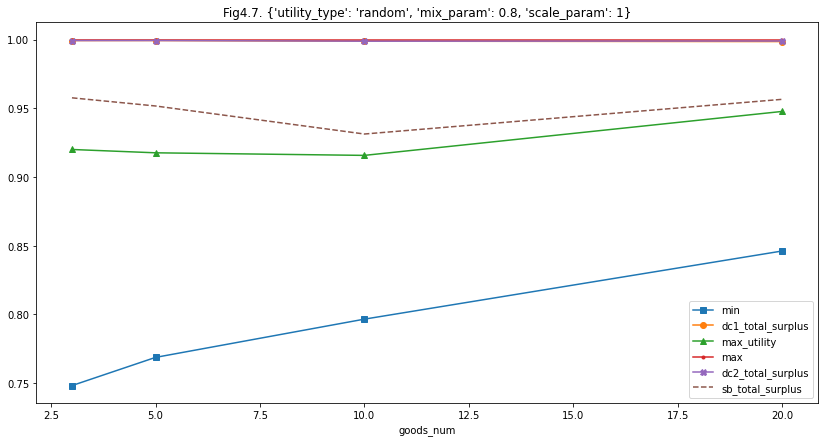

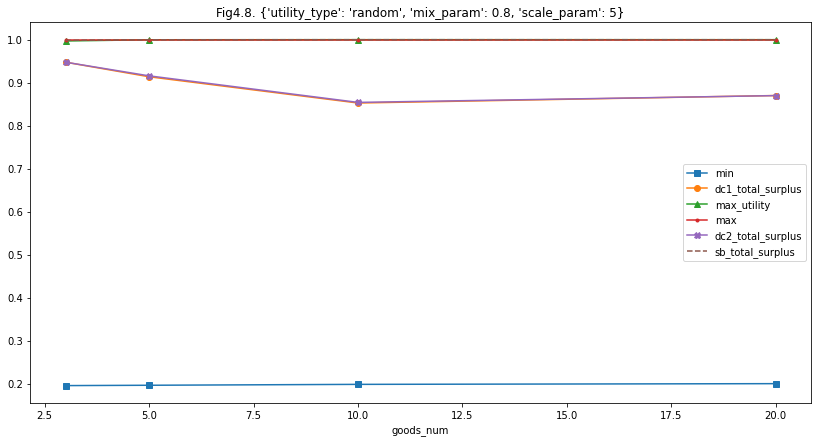

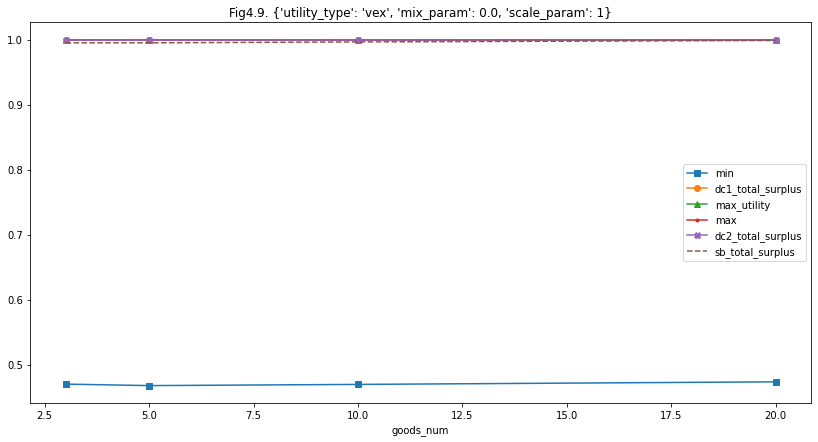

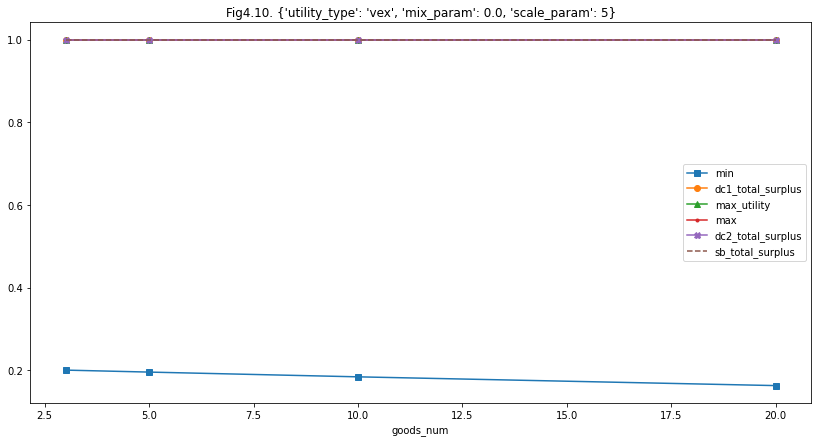

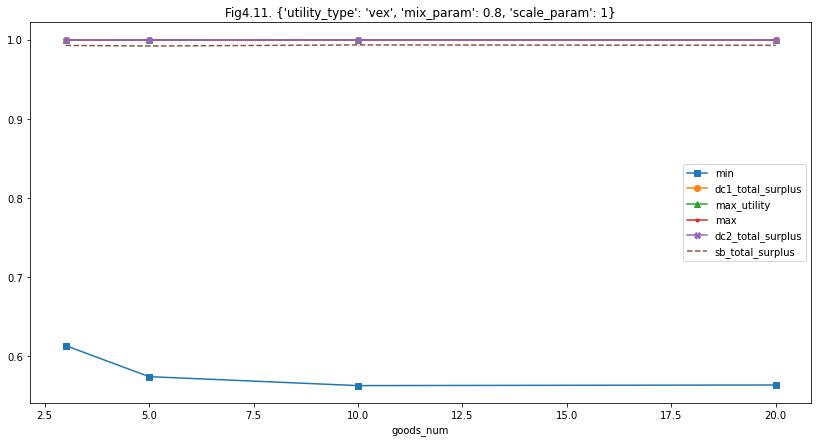

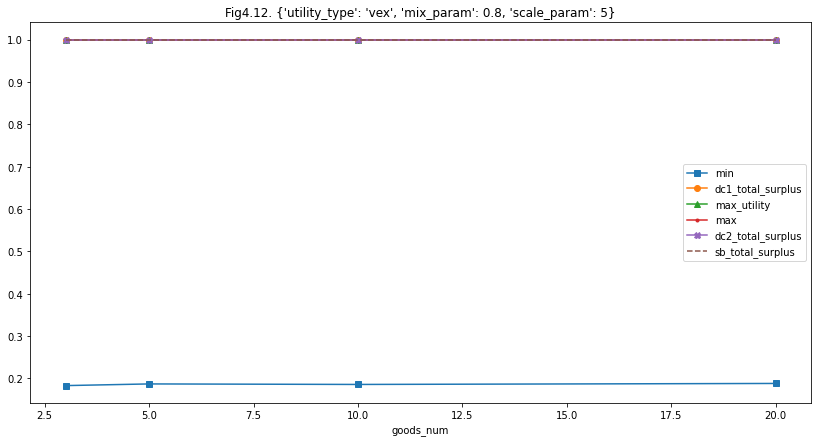

In [33]:
ts_data = ts_exp.load_experiment()
ts_r_data = ts_data.groupby(['utility_type', 'mix_param', 'scale_param', 'goods_num']).mean()
for idx, i in enumerate(ts_r_data.index.droplevel('goods_num').unique(), 1):
    title = str(dict(zip(ts_r_data.index.names[:3], i)))
    title = f'Fig4.{idx}. {title}'
    (
        ts_r_data
        .loc[(*i, slice(None))]
        .droplevel(['utility_type', 'mix_param', 'scale_param'])
        .plot(
            style=['s-', 'o-', '^-', '.-', 'X-', '--'],
            figsize=(14, 7), 
            title=title, 
        )
    )